In [1]:
# TODO list:
# (I) Plot fractional absorption change version of March8-[27]
# (II) Redo March23-[34] by complying with def. of effective Jsat given at March23-[2]
# (III) Fish for 2ΔE/E approx = 0.046, which will happen at some low E_n, go for E_n s.t. 2ΔE/E>0.045?

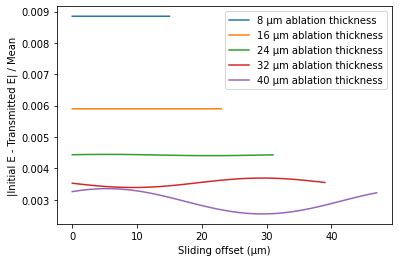

In [6]:
# (I) Amplitude of Absolute Change over Mean: !!Note: The values that will be used are from the first report, which investigated beams of E_n = 0.04 uJ
# We will investigate transmission of zebra patterned graphene on a beam with the independent variable of ablation thickness, ranging 8,16,..,40um while other parameters are fixed. We will see how transmission changes with ablated part getting larger, and also look for fluctuations when the graphene is shifted, keeping the beam fixed.
# Reading the data of March8-[27] and plotting accordingly:
import matplotlib.pyplot as plt

# ee = beam_initialize(res=40, threshold=10**-10, w=35)
# init_E = integrate_for_energy(ee)  # Yields 0.040045414
# del(ee)
init_E = 0.040045414

configs = [2,4,8,16,24,32,40]
results = []
for j in configs:
    a = []
    with open(f"{j}.txt",'r') as file:
        for i in range(2):
            _ = file.readline()
        for i in file.readlines():
            a.append(float(i.split()[2]))
    results.append(a)

mean_E = results[0][0]  # 2um ablation thickness yields no fluctuation, taken as mean
for i in range(2,7):
    plt.plot([((init_E-j)/mean_E) for j in results[i]], label=f"{str(configs[i])} μm ablation thickness")
plt.ylabel('|Initial E - Transmitted E| / Mean')
plt.xlabel('Sliding offset (μm)')
# Note that for every graphene pattern, there are 8um between ablated regions
# Plotting of a configuration is truncated after the layer becomes identical to initial placement wrt beam
plt.legend(loc = 'best')
plt.show()

In [ ]:
# (II) Plot effective Jsat, (eJsat = Esat/(pi*25^2) vs thickness of ablation, Esat := E-val s.t. ΔΕ/Ε = initEfrac/2)
# Mind that (III) can be done in a similar manner as shown below:

from beam import *

Einput = np.pi*(25**2)*0.00000015*10  # Einput will be 10-fold of [Jsat*Area]
ee = beam_initialize(res=33, threshold=10**-10, w=25, Ep=Einput)  # Resolution: about 30nm for unit length
Ein = integrate_for_energy(ee)
ablation_thicknesses = [i for i in range(0,45,5)]  # !!When actually running the code, multithread different thicknesses

results = []
for i in ablation_thicknesses:
    mm = mask_initialize(beam=ee, shape='lines',width=5,thickness=i)
    # Initial ΔΕ/Ε calculation:
    ss = mask_apply(beam=ee,mask=mm)
    initEfrac_over2 = ((Ein-integrate_for_energy(ss))/Ein)/2
    # Searching:
    cursor = 50*Ein  # Change cursor&bound as you please
    bound = 50*Ein  # Will search around [0, 100*Ein]
    while True:  # Binary search, might get caught up in an infinite loop if boundaries are not sane
        # Binary search between E = [Ein,0], if ΔΕ/Ε approx (initEfrac/2), append result to results[]
        # Percent difference threshold for bingo: <2%
        ee = beam_initialize(res=33, threshold=10**-10, w=25, Ep=cursor)
        mm = mask_initialize(beam=ee, shape='lines',width=5,thickness=i)
        ss = mask_apply(beam=ee,mask=mm)
        Eval = integrate_for_energy(ee)
        tmp_dE_E = (Eval - integrate_for_energy(ss))/Eval
        if (abs(tmp_dE_E-initEfrac_over2)/initEfrac_over2)<0.02:
            results.append(Eval/(np.pi*(25**2)))
            break
        elif tmp_dE_E > initEfrac_over2:
            bound /= 2
            cursor += bound
        else:
            bound /= 2
            cursor -= bound

# There seems to be an issue with the definitions, it is not feasible to find a value close to initEfrac_over2

In [ ]:
# (III) is postponed until further clarification on (II)